In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/household-power-consumption/household_power_consumption.txt


In [3]:
# load all data
dataset = pd.read_csv('../input/household-power-consumption/household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# summarize
print(dataset.shape)
print(dataset.head())
dataset.tail()



(2075259, 7)
                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2010-11-26 21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0
2010-11-26 21:02:00,0.932,0.000,239.550,3.800,0.000,0.000,0.0


In [4]:
# mark all missing values
dataset.replace('?',np.nan, inplace=True)

In [5]:
dataset.tail(365)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2010-11-26 14:58:00,2.254,0.692,238.020,10.000,0.000,0.000,17.0
2010-11-26 14:59:00,2.226,0.690,238.100,10.000,0.000,0.000,18.0
2010-11-26 15:00:00,2.240,0.696,238.820,10.000,0.000,0.000,17.0
2010-11-26 15:01:00,1.588,0.268,239.910,6.800,0.000,0.000,18.0
2010-11-26 15:02:00,1.452,0.178,240.940,6.000,0.000,0.000,18.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0


In [6]:
dataset.describe(include='all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2049280,2049280,2049280,2049280,2049280,2049280,2.049280e+06
unique,4186,532,2837,221,88,81,NaN
top,0.218,0.000,241.180,1.000,0.000,0.000,NaN
freq,9565,481561,3559,172785,1880175,1436830,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6.458447e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,8.437154e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01


In [7]:
columns = list(dataset.columns)

for col in columns:
    dataset[col] = dataset[col].astype(str).astype('float32')

In [8]:
dataset.dtypes

Global_active_power      float32
Global_reactive_power    float32
Voltage                  float32
Global_intensity         float32
Sub_metering_1           float32
Sub_metering_2           float32
Sub_metering_3           float32
dtype: object

In [9]:

dataset.fillna(method='bfill',inplace=True)

In [10]:
dataset.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [11]:
import matplotlib.pyplot as plt

df_daily = dataset.resample('D').sum()

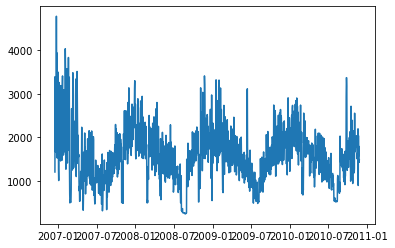

In [12]:

plt.plot(df_daily.index,df_daily.Global_active_power)


In [13]:


dataset.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.242494,-0.398128,0.998894,0.481871,0.431681,0.639708
Global_reactive_power,0.242494,1.000000,-0.102553,0.261462,0.121994,0.139146,0.084983
Voltage,-0.398128,-0.102553,1.000000,-0.409587,-0.193148,-0.163771,-0.272638
Global_intensity,0.998894,0.261462,-0.409587,1.000000,0.486846,0.437537,0.627841
Sub_metering_1,0.481871,0.121994,-0.193148,0.486846,1.000000,0.054967,0.101483
Sub_metering_2,0.431681,0.139146,-0.163771,0.437537,0.054967,1.000000,0.079014
Sub_metering_3,0.639708,0.084983,-0.272638,0.627841,0.101483,0.079014,1.000000


In [15]:


df_daily.reset_index(inplace=True)


x_test = df_daily.tail(365)
x_train = df_daily[:-365]

df_daily.dtypes

datetime                 datetime64[ns]
Global_active_power             float32
Global_reactive_power           float32
Voltage                         float32
Global_intensity                float32
Sub_metering_1                  float32
Sub_metering_2                  float32
Sub_metering_3                  float32
dtype: object

In [16]:


df_uni = df_daily[['datetime','Global_active_power']]

# making a new dataframe from df_daily2 but renaming the columns
new_df = df_uni.rename(columns={"datetime": "ds", "Global_active_power": "y"})



In [17]:
from fbprophet import Prophet
x_test_uni = new_df.tail(365)
x_train_uni = new_df[:-365]

In [18]:
model = Prophet()

In [19]:
model.fit(x_train_uni)

In [20]:
future = model.make_future_dataframe(periods=365 , freq= 'D' )
result_uni = model.predict(future)


In [21]:
result_uni.shape

(1442, 19)

In [22]:
result_uni.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1637.740980,1875.759496,2991.900810,1637.740980,1637.740980,787.520411,787.520411,787.520411,248.298453,248.298453,248.298453,539.221959,539.221959,539.221959,0.0,0.0,0.0,2425.261391
1,2006-12-17,1637.599785,1884.214140,2949.824931,1637.599785,1637.599785,784.519320,784.519320,784.519320,230.855159,230.855159,230.855159,553.664161,553.664161,553.664161,0.0,0.0,0.0,2422.119105
2,2006-12-18,1637.458591,1455.117392,2618.140474,1637.458591,1637.458591,406.061837,406.061837,406.061837,-162.644899,-162.644899,-162.644899,568.706736,568.706736,568.706736,0.0,0.0,0.0,2043.520428
3,2006-12-19,1637.317397,1594.182377,2764.834047,1637.317397,1637.317397,554.688700,554.688700,554.688700,-29.219887,-29.219887,-29.219887,583.908587,583.908587,583.908587,0.0,0.0,0.0,2192.006097
4,2006-12-20,1637.176202,1617.607916,2776.064533,1637.176202,1637.176202,574.981796,574.981796,574.981796,-23.837692,-23.837692,-23.837692,598.819487,598.819487,598.819487,0.0,0.0,0.0,2212.157998


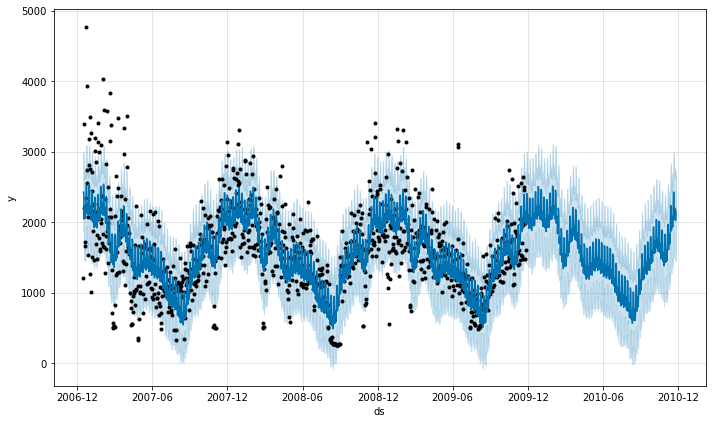

In [23]:
model.plot(result_uni)
plt.show()



In [24]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [25]:
# MAPE
mean_absolute_percentage_error(x_test_uni['y'], result_uni['yhat'][-365:])

21.0245017623563

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(x_test_uni['y'], result_uni['yhat'][-365:]))
print(rmse)

405.15937357804967


In [27]:
# statsmodels is a Python module for statistical models,conducting statistical tests and statistical data exploration.
import statsmodels.api as sm

from pylab import rcParams
#pylab is a module within the matplotlib library that was built to mimic MATLAB’s global style , All module objects starting with “rc” are a means to interact with your plot styles and settings

rcParams['figure.figsize']= 15,8

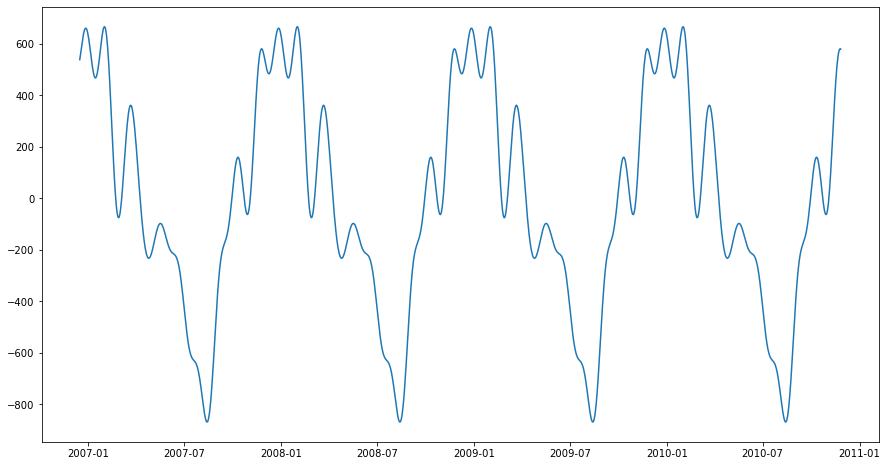

In [28]:


plt.plot(result_uni['ds'],result_uni['yearly'])
plt.show()

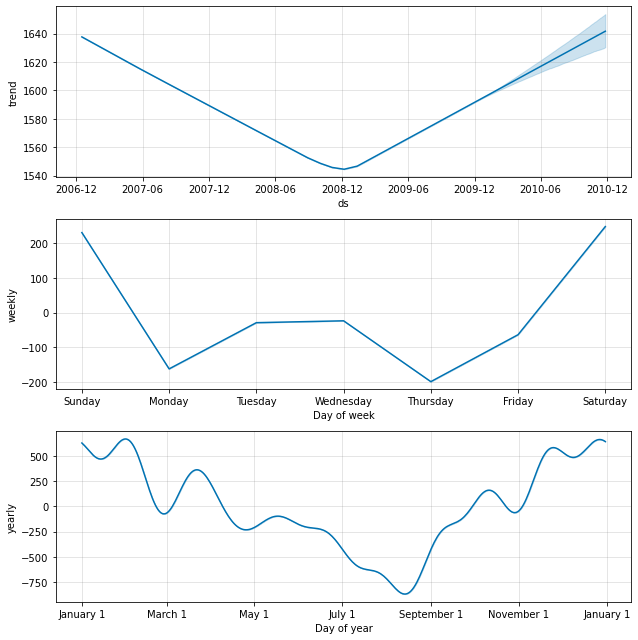

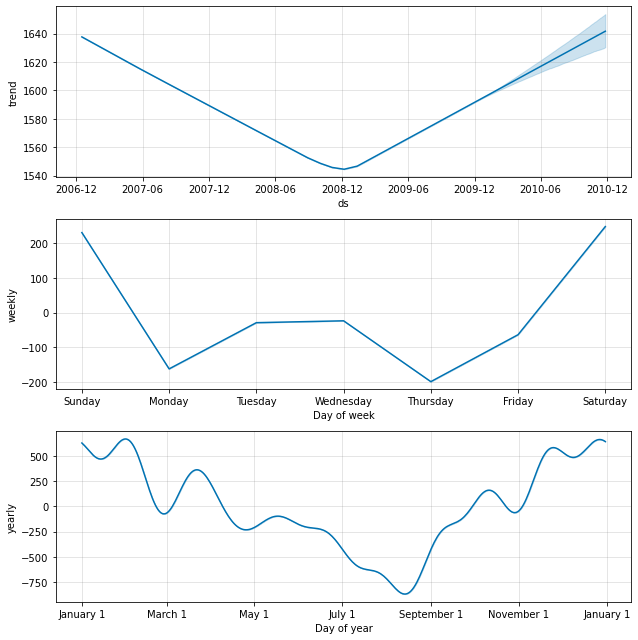

In [54]:
model.plot_components(result_uni)

In [29]:


new_df = df_daily.copy()



# making a new dataframe from df_daily2 but renaming the columns
new_df_mul= new_df.rename(columns={"datetime": "ds", "Global_active_power": "y","Global_reactive_power": "add1","Voltage": "add2","Global_intensity": "add3","Sub_metering_1": "add4","Sub_metering_2": "add5","Sub_metering_3": "add6"})


In [31]:


x_test_multi = new_df_mul.tail(365)
x_train_multi = new_df_mul[:-365]

In [32]:
print(x_train_multi)

             ds            y        add1          add2          add3    add4  \
0    2006-12-16  1209.176025   34.922001   93552.53125   5180.799805     0.0   
1    2006-12-17  3390.459961  226.005997  345725.31250  14398.599609  2033.0   
2    2006-12-18  2203.825928  161.792007  347373.62500   9247.200195  1063.0   
3    2006-12-19  1666.193970  150.942001  348479.00000   7094.000000   839.0   
4    2006-12-20  2225.748047  160.998001  348923.62500   9313.000000     0.0   
...         ...          ...         ...           ...           ...     ...   
1072 2009-11-22  2450.976074  222.638000  347151.87500  10358.200195  6774.0   
1073 2009-11-23  1471.121948  148.337997  349549.50000   6100.799805     0.0   
1074 2009-11-24  2128.855957  153.820007  348446.18750   8899.000000  2491.0   
1075 2009-11-25  1980.130005  175.475998  347297.43750   8309.200195   745.0   
1076 2009-11-26  1599.625977  141.542007  349406.59375   6640.200195  2262.0   

        add5     add6  
0      546.0   

In [46]:
# regressors = ['add1','add2','add3','add4','add5','add6']
model_multi = Prophet()


In [47]:
model_multi.fit(x_train_multi)

In [48]:
future = model_multi.make_future_dataframe(periods=365,freq='D')
result_multi= model_multi.predict(future)

In [ ]:
model_multi.plot(result_multi)
plt.show()



In [49]:
# MAPE
mean_absolute_percentage_error(x_test_multi['y'], result_multi['yhat'][-365:])

21.0245017623563

In [50]:
rmse_multi = sqrt(mean_squared_error(x_test_multi['y'], result_multi['yhat'][-365:]))
print(rmse_multi)

405.15937357804967


In [51]:
print(x_train_uni)

             ds            y
0    2006-12-16  1209.176025
1    2006-12-17  3390.459961
2    2006-12-18  2203.825928
3    2006-12-19  1666.193970
4    2006-12-20  2225.748047
...         ...          ...
1072 2009-11-22  2450.976074
1073 2009-11-23  1471.121948
1074 2009-11-24  2128.855957
1075 2009-11-25  1980.130005
1076 2009-11-26  1599.625977

[1077 rows x 2 columns]


In [52]:
print(x_train_multi)

             ds            y        add1          add2          add3    add4  \
0    2006-12-16  1209.176025   34.922001   93552.53125   5180.799805     0.0   
1    2006-12-17  3390.459961  226.005997  345725.31250  14398.599609  2033.0   
2    2006-12-18  2203.825928  161.792007  347373.62500   9247.200195  1063.0   
3    2006-12-19  1666.193970  150.942001  348479.00000   7094.000000   839.0   
4    2006-12-20  2225.748047  160.998001  348923.62500   9313.000000     0.0   
...         ...          ...         ...           ...           ...     ...   
1072 2009-11-22  2450.976074  222.638000  347151.87500  10358.200195  6774.0   
1073 2009-11-23  1471.121948  148.337997  349549.50000   6100.799805     0.0   
1074 2009-11-24  2128.855957  153.820007  348446.18750   8899.000000  2491.0   
1075 2009-11-25  1980.130005  175.475998  347297.43750   8309.200195   745.0   
1076 2009-11-26  1599.625977  141.542007  349406.59375   6640.200195  2262.0   

        add5     add6  
0      546.0   

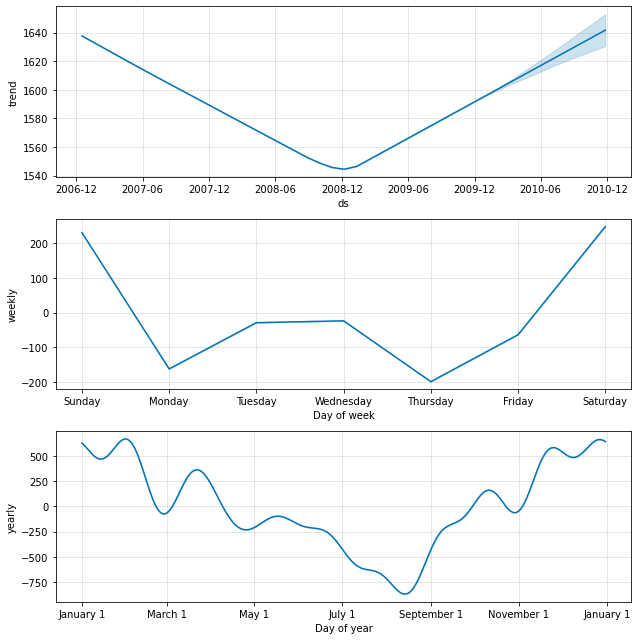

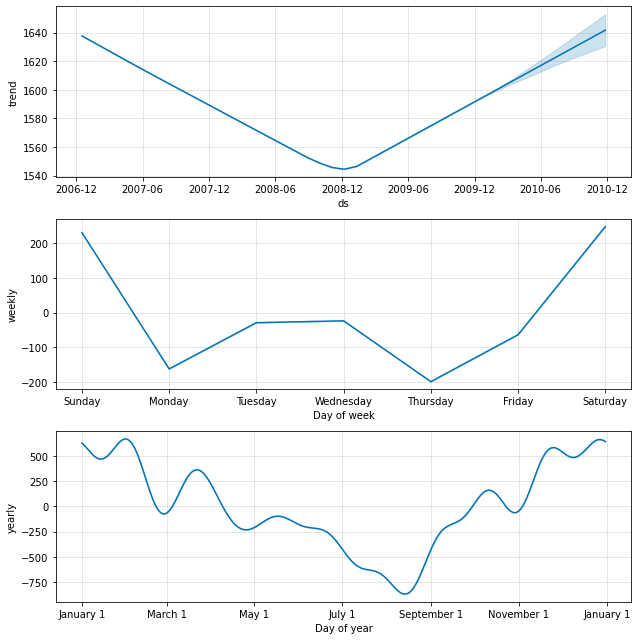

In [53]:
model_multi.plot_components(result_multi)